In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data =pd.read_csv("C:/Users/Aasrith Reddy/OneDrive/Desktop/EV_Car_Details.csv")
data.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,BodyStyle
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Sedan
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Hatchback
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Liftback
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,SUV
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Hatchback


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            25 non-null     object 
 1   Model            25 non-null     object 
 2   AccelSec         25 non-null     float64
 3   TopSpeed_KmH     25 non-null     int64  
 4   Range_Km         25 non-null     int64  
 5   Efficiency_WhKm  25 non-null     int64  
 6   FastCharge_KmH   25 non-null     int64  
 7   RapidCharge      25 non-null     object 
 8   PowerTrain       25 non-null     object 
 9   BodyStyle        25 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ KB


In [4]:
print(pd.isnull(data).sum())

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
BodyStyle          0
dtype: int64


In [5]:
data.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'BodyStyle'],
      dtype='object')

In [6]:
data.describe(include='all')

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,BodyStyle
count,25,25,25.000000,25.000000,25.000000,25.000000,25.000000,25,25,25
unique,16,25,NaN,NaN,NaN,NaN,NaN,1,3,4
top,Tesla,Model 3 Long Range Dual Motor,NaN,NaN,NaN,NaN,NaN,Yes,AWD,Hatchback
freq,4,1,NaN,NaN,NaN,NaN,NaN,25,9,8
mean,NaN,NaN,6.632000,185.080000,336.400000,176.240000,495.600000,NaN,NaN,NaN
std,NaN,NaN,2.336971,40.069648,108.027003,19.083763,249.617708,NaN,NaN,NaN
min,NaN,NaN,2.800000,140.000000,170.000000,153.000000,190.000000,NaN,NaN,NaN
25%,NaN,NaN,4.700000,150.000000,250.000000,164.000000,260.000000,NaN,NaN,NaN
50%,NaN,NaN,7.300000,167.000000,360.000000,168.000000,440.000000,NaN,NaN,NaN
75%,NaN,NaN,8.100000,217.000000,420.000000,183.000000,650.000000,NaN,NaN,NaN


In [7]:
data['Brand'] = data['Brand'].astype('category')
data['Brand'] = data['Brand'].cat.codes

data['Model'] = data['Model'].astype('category')
data['Model'] = data['Model'].cat.codes

data['RapidCharge'] = data['RapidCharge'].astype('category')
data['RapidCharge'] = data['RapidCharge'].cat.codes

data['PowerTrain'] = data['PowerTrain'].astype('category')
data['PowerTrain'] = data['PowerTrain'].cat.codes

data['BodyStyle'] = data['BodyStyle'].astype('category')
data['BodyStyle'] = data['BodyStyle'].cat.codes

In [8]:
data.isna().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
BodyStyle          0
dtype: int64

In [9]:
data.corr()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,BodyStyle
Brand,1.000000,-0.339265,0.057915,0.159773,-0.024075,-0.199523,0.201771,NaN,-0.045807,-0.014215
Model,-0.339265,1.000000,-0.040699,-0.006075,-0.144906,0.171173,0.117030,NaN,0.242448,0.096858
AccelSec,0.057915,-0.040699,1.000000,-0.883895,-0.776558,-0.416583,-0.852011,NaN,0.615751,-0.731323
TopSpeed_KmH,0.159773,-0.006075,-0.883895,1.000000,0.762536,0.288275,0.877853,NaN,-0.576338,0.789450
Range_Km,-0.024075,-0.144906,-0.776558,0.762536,1.000000,0.322906,0.770745,NaN,-0.481126,0.774703
Efficiency_WhKm,-0.199523,0.171173,-0.416583,0.288275,0.322906,1.000000,0.267708,NaN,-0.305855,0.426261
FastCharge_KmH,0.201771,0.117030,-0.852011,0.877853,0.770745,0.267708,1.000000,NaN,-0.550903,0.748159
RapidCharge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PowerTrain,-0.045807,0.242448,0.615751,-0.576338,-0.481126,-0.305855,-0.550903,NaN,1.000000,-0.340812
BodyStyle,-0.014215,0.096858,-0.731323,0.789450,0.774703,0.426261,0.748159,NaN,-0.340812,1.000000


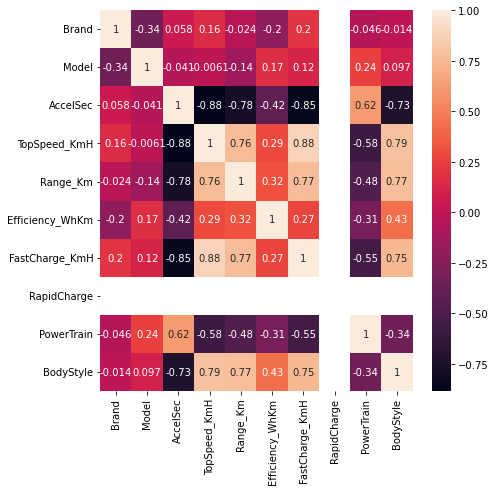

In [10]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


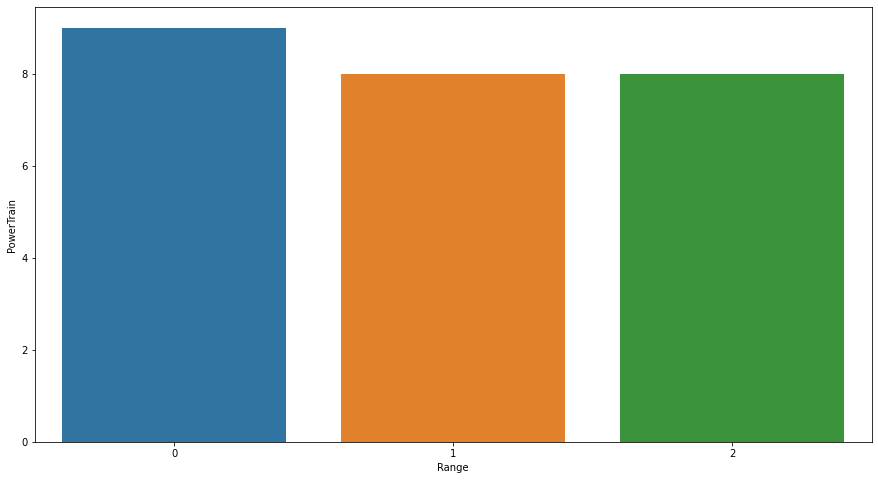

In [11]:
plt.figure(figsize=(15,8))
sns.countplot(data.PowerTrain)
plt.xlabel("Range")
plt.ylabel("PowerTrain")
plt.show()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            25 non-null     int8   
 1   Model            25 non-null     int8   
 2   AccelSec         25 non-null     float64
 3   TopSpeed_KmH     25 non-null     int64  
 4   Range_Km         25 non-null     int64  
 5   Efficiency_WhKm  25 non-null     int64  
 6   FastCharge_KmH   25 non-null     int64  
 7   RapidCharge      25 non-null     int8   
 8   PowerTrain       25 non-null     int8   
 9   BodyStyle        25 non-null     int8   
dtypes: float64(1), int64(4), int8(5)
memory usage: 1.2 KB


In [13]:
data = data.drop(columns= ['Brand'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


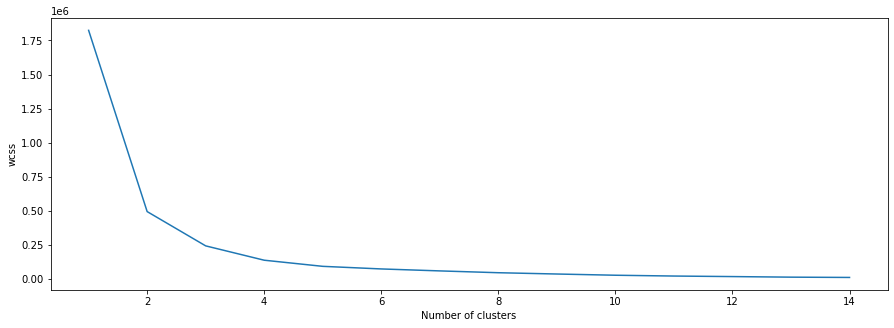

In [14]:
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15, 5))
plt.plot(range(1, 15), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [15]:
kmeans = KMeans(4, init = 'k-means++', random_state=42).fit(data)
data['cluster_number'] = kmeans.labels_

In [16]:
data

,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,BodyStyle,cluster_number
0,11,4.6,233,450,161,940,0,0,3,2
1,6,10.0,160,270,167,250,0,2,0,0
2,0,4.7,210,400,181,620,0,0,1,1
3,24,6.8,180,360,206,560,0,2,2,1
4,18,9.5,145,170,168,190,0,2,0,0
5,1,2.8,250,610,180,620,0,0,3,1
6,20,9.6,150,190,168,220,0,1,0,0
7,19,8.1,150,275,164,420,0,1,0,3
8,13,5.6,225,310,153,650,0,2,3,1
9,15,6.3,180,400,193,540,0,0,2,1


In [18]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

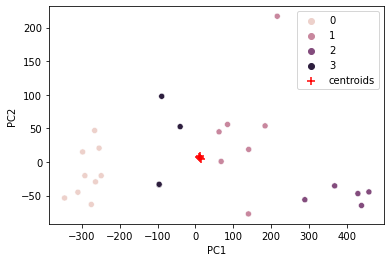

In [19]:
x = data.values
pca = preprocessing.scale(x)
pca = PCA(n_components=8)
pca = pca.fit_transform(x)

pf = pd.DataFrame(data=pca, columns=[f"PC{i+1}" for i in range(8)])
sns.scatterplot(data=pf, x='PC1', y='PC2', hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='+', c="r", s=50, label='centroids')
plt.legend()
plt.show()

<AxesSubplot:xlabel='cluster_number', ylabel='TopSpeed_KmH'>

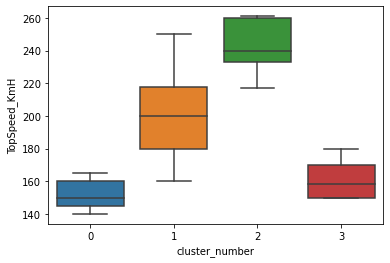

In [23]:
sns.boxplot(x='cluster_number', y='TopSpeed_KmH', data=data)

<AxesSubplot:xlabel='cluster_number', ylabel='Range_Km'>

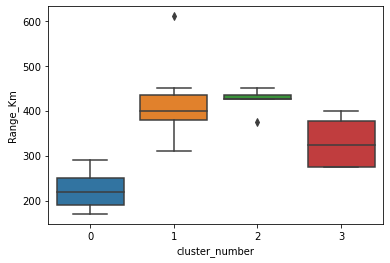

In [24]:
sns.boxplot(x='cluster_number', y='Range_Km', data=data)

<AxesSubplot:xlabel='cluster_number', ylabel='FastCharge_KmH'>

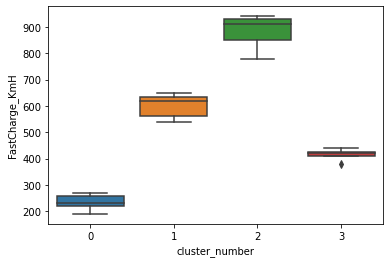

In [25]:
sns.boxplot(x='cluster_number', y='FastCharge_KmH', data=data)

<AxesSubplot:xlabel='cluster_number', ylabel='Model'>

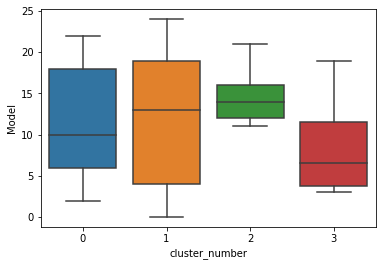

In [26]:
sns.boxplot(x='cluster_number', y='Model', data=data)